### Центральная Предельная Теорема Своими Руками

In [10]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [12]:
dataFrame = pd.DataFrame(np.random.standard_normal(1000))

In [13]:
dataFrame.head()

,0
0,-0.704627
1,-0.341403
2,0.374486
3,0.085385
4,-0.007711


In [14]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
0    1000 non-null float64
dtypes: float64(1)
memory usage: 7.9 KB


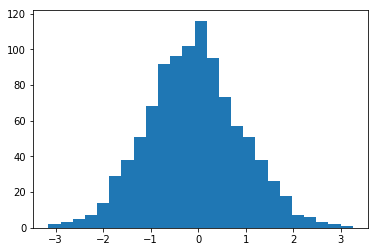

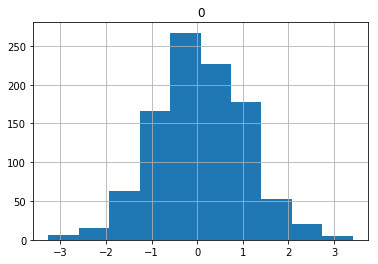

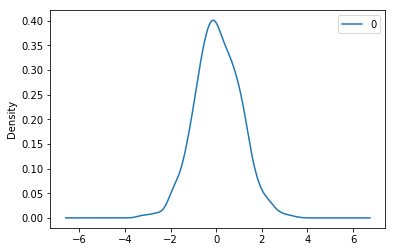

In [19]:
plt.figure();
plt.hist(np.random.standard_normal(1000), 25)
dataFrame.hist();
dataFrame.plot(kind='kde');

In [25]:
len(dataFrame[0])

1000

In [55]:
n = 3
arr = np.array([])
for i in range(0, 999):
    dist = np.array([])
    for k in range(0, n-1):
        dist = np.append(dist, dataFrame[0][np.random.randint(0, len(dataFrame[0])-1)])
    
    arr = np.append(arr, np.average(dist))

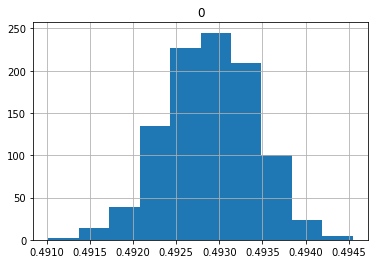

In [56]:
dataFrame = pd.DataFrame(arr)
plt.figure();
dataFrame.hist();

In [ ]:
dataFrame = pd.DataFrame(arr)
